In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
BASE_DIR = "/content/drive/MyDrive/knee-osteo-arthritis"
os.chdir(BASE_DIR)
print("Working dir:", os.getcwd())

Working dir: /content/drive/MyDrive/knee-osteo-arthritis


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3
import keras
from numpy import load

from sklearn.model_selection import train_test_split
from keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

In [5]:
train_dir = '/content/drive/MyDrive/knee-osteo-arthritis/dataset/train'
test_dir  = '/content/drive/MyDrive/knee-osteo-arthritis/dataset/test'

In [6]:
import os
print("Train folders:", os.listdir(train_dir))
print("Test folders:", os.listdir(test_dir))

Train folders: ['2', '1', '0', '3', '4']
Test folders: ['4', '1', '3', '0', '2']


In [7]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,target_size=(img_height, img_width))

Found 5778 images belonging to 5 classes.


In [9]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1656 images belonging to 5 classes.


In [10]:
 base_model = InceptionV3(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [11]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [12]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [13]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(1024, activation='elu'))
classifier.add(Dense(512, activation='swish'))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(5,activation='sigmoid'))
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    52,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,890,021 (285.68 MB)

 Trainable params: 53,087,237 (202.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history = classifier.fit(train_data_gen, epochs=10,validation_data= val_data_gen,)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 2926s 5s/step - accuracy: 0.4019 - loss: 7.1794 - val_accuracy: 0.4408 - val_loss: 1.2550
Epoch 2/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.4804 - loss: 1.2039 - val_accuracy: 0.4758 - val_loss: 1.1794
Epoch 3/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.5346 - loss: 1.0949 - val_accuracy: 0.5042 - val_loss: 1.1790
Epoch 4/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.5702 - loss: 1.0207 - val_accuracy: 0.5223 - val_loss: 1.1607
Epoch 5/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.5900 - loss: 0.9783 - val_accuracy: 0.5205 - val_loss: 1.1765
Epoch 6/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.6311 - loss: 0.8891 - val_accuracy: 0.5036 - val_loss: 1.2406
Epoch 7/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.6432 - loss: 0.8533 - val_accuracy: 0.5139 - val_loss: 1.2087
Epoch 8/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.6730 - loss: 0.7439 - 

In [16]:
pip install Pillow

In [17]:
import numpy as np

# Use __next__() instead of next() to iterate through the generator
y = np.concatenate([val_data_gen.__next__()[1] for i in range(len(val_data_gen))])
true_labels = np.argmax(y, axis=-1)
prediction = classifier.predict(val_data_gen, verbose=2)
prediction = np.argmax(prediction, axis=-1)

166/166 - 24s - 145ms/step


In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [21]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[537  29  72   1   0]
 [196  19  79   2   0]
 [172  36 204  31   4]
 [ 37  23  93  59  11]
 [  1   0   8  11  31]]
Accuracy: 0.513
Precision: 0.530
Recall: 0.513
F-Measure: 0.513


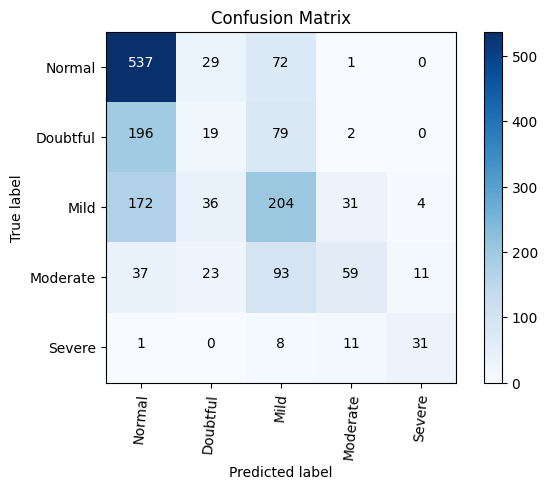

In [22]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[0,1], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred


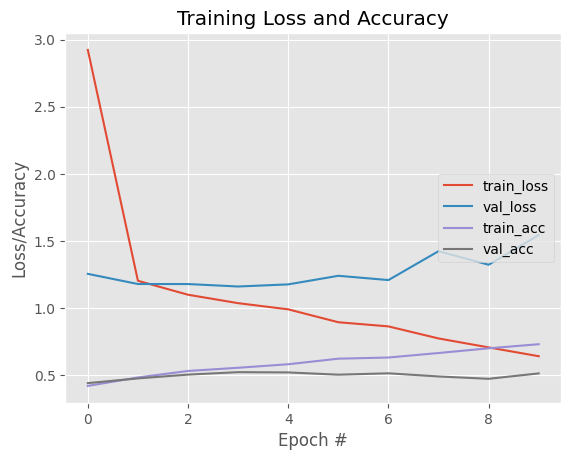

In [24]:
# plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
#plt.savefig("CNN_Model")

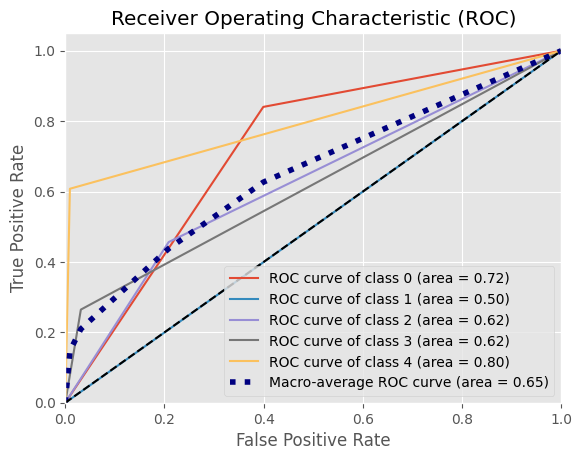

In [25]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'prediction' and 'true_labels' from your model

# Convert predictions to one-hot encoded probabilities
n_classes = 5  # Replace with the actual number of classes in your problem
prediction_probabilities = to_categorical(prediction, num_classes=n_classes)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels == i, prediction_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

macro_roc_auc = auc(all_fpr, mean_tpr)


# Plot ROC curves for all classes and macro-average
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot(all_fpr, mean_tpr, label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
# Assuming you have 'prediction' and 'true_labels' from your model
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

# Get the number of classes
num_classes = cm.shape[0]

# Calculate per-class accuracy
per_class_accuracy = []
for i in range(num_classes):
    class_accuracy = cm[i, i] / np.sum(cm[i, :])  # Correct predictions for class i / Total predictions for class i
    per_class_accuracy.append(class_accuracy)

# Print per-class accuracy
for i, accuracy in enumerate(per_class_accuracy):
    print(f"Accuracy for class {i}: {accuracy:.3f}")

Accuracy for class 0: 0.840
Accuracy for class 1: 0.064
Accuracy for class 2: 0.456
Accuracy for class 3: 0.265
Accuracy for class 4: 0.608


In [27]:
import os
save_path=os.path.join('/content/drive/MyDrive/Saved MODELS/Inception_V3','InceptionV3_AFS_1.h5')
classifier.save(save_path)